# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [67]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&units=imperial&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Latitude": city_lat, 
                          "Longitude": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | roald
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | oliveira dos brejinhos
Processing Record 5 of Set 1 | honningsvag
Processing Record 6 of Set 1 | baijiantan
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | perth
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | shimoda
Processing Record 18 of Set 1 | kindu
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | imbituba
Processing Record 21 of Set 1 | ilinskoye-khovanskoye
Processing Record 22 of 

In [68]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Latitude      561
Longitude     561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [69]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,roald,62.5833,6.1333,37.76,86,100,6.91,NO,1679871987
1,ushuaia,-54.8000,-68.3000,44.26,61,0,14.97,AR,1679871799
2,hermanus,-34.4187,19.2345,56.80,68,15,17.78,ZA,1679871988
3,oliveira dos brejinhos,-12.3169,-42.8961,75.16,71,77,0.25,BR,1679871988
4,honningsvag,70.9821,25.9704,28.15,64,20,11.50,NO,1679871989


In [70]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [71]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,roald,62.5833,6.1333,37.76,86,100,6.91,NO,1679871987
1,ushuaia,-54.8000,-68.3000,44.26,61,0,14.97,AR,1679871799
2,hermanus,-34.4187,19.2345,56.80,68,15,17.78,ZA,1679871988
3,oliveira dos brejinhos,-12.3169,-42.8961,75.16,71,77,0.25,BR,1679871988
4,honningsvag,70.9821,25.9704,28.15,64,20,11.50,NO,1679871989


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

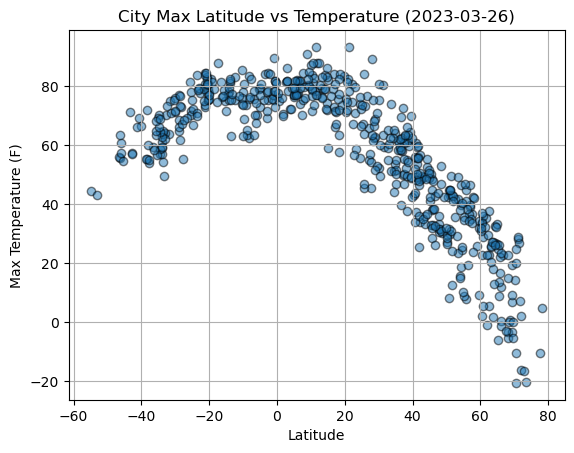

In [72]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Max Temp"], edgecolors="black", marker="o", alpha=0.5, )
# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2023-03-26)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

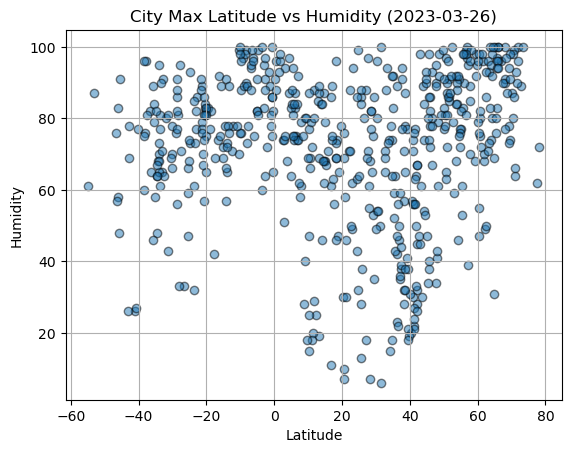

In [73]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], edgecolors="black", marker="o", alpha=0.5, )
# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity (2023-03-26)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

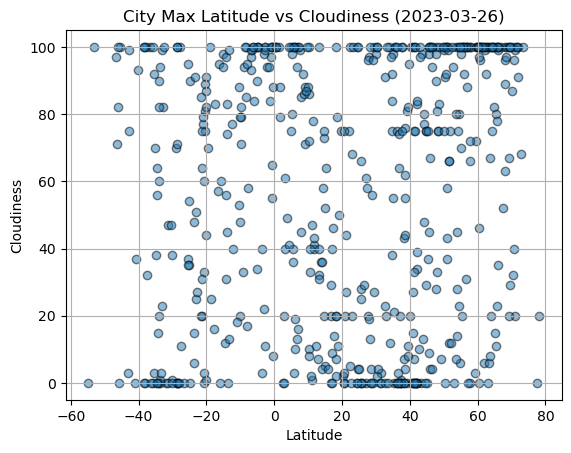

In [74]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], edgecolors="black", marker="o", alpha=0.5, )

# Incorporate the other graph properties
plt.title("City Max Latitude vs Cloudiness (2023-03-26)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

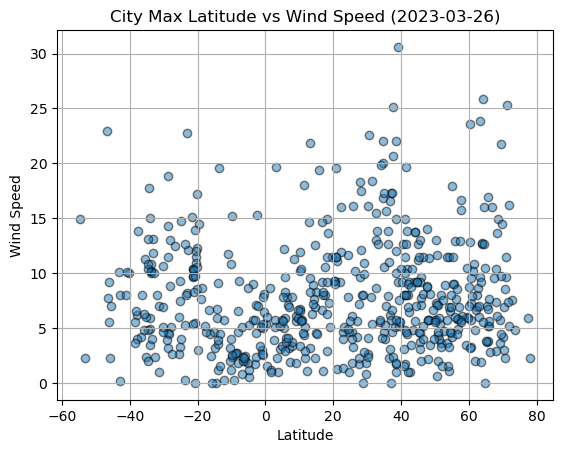

In [76]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], edgecolors="black", marker="o", alpha=0.5, )

# Incorporate the other graph properties
plt.title("City Max Latitude vs Wind Speed (2023-03-26)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def regressionplot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r--")
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.title(y_values.name + " by " + x_values.name)
    plt.annotate(line_eq,(min(x_values), min(y_values)),fontsize=15,color="red")
    
    return print(f"The r-value is: {rvalue**2}"), plt.show()

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Latitude"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,roald,62.5833,6.1333,37.76,86,100,6.91,NO,1679871987
4,honningsvag,70.9821,25.9704,28.15,64,20,11.50,NO,1679871989
5,baijiantan,45.6333,85.1833,44.69,38,45,3.76,CN,1679871989
6,qaqortoq,60.7167,-46.0333,28.90,75,100,7.25,GL,1679871990
7,albany,42.6001,-73.9662,48.61,47,10,1.01,US,1679871991


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Latitude"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,44.26,61,0,14.97,AR,1679871799
2,hermanus,-34.4187,19.2345,56.80,68,15,17.78,ZA,1679871988
3,oliveira dos brejinhos,-12.3169,-42.8961,75.16,71,77,0.25,BR,1679871988
10,perth,-31.9333,115.8333,63.66,80,0,8.05,AU,1679871736
11,mahebourg,-20.4081,57.7000,79.09,83,75,11.50,MU,1679871993


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8181663882636626


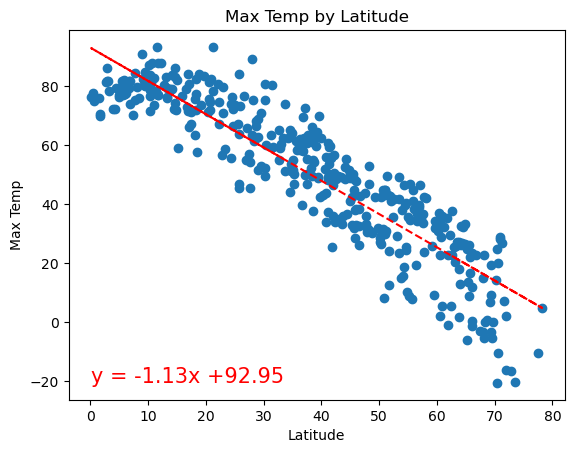

(None, None)

In [92]:
# Linear regression on Northern Hemisphere
regressionplot(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp"] )


The r-value is: 0.4543122773688736


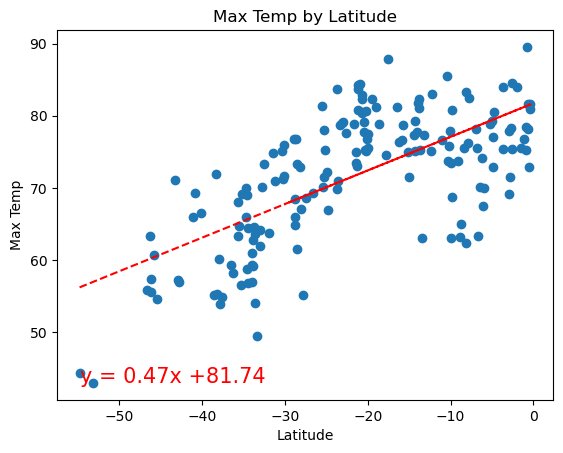

(None, None)

In [93]:
# Linear regression on Southern Hemisphere
regressionplot(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp"] )


**Discussion about the linear relationship:** In the Northern hemisphere, ther is a strong negative relationshop between Latitude and Max Temperaure. THis means, ans the Latitudes get forther from 0, or further from the equator, the Max Temperature is lower. While the plot looks the opposite for the southern hemisphere, the same replationship is true. However, this relationship in our data is weaker than for the northern hemisphere. The Southern hemisphere data shows a weak relationship where, as you get closer to the 0, or equator, the Max Temperature is higher. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06403484637880907


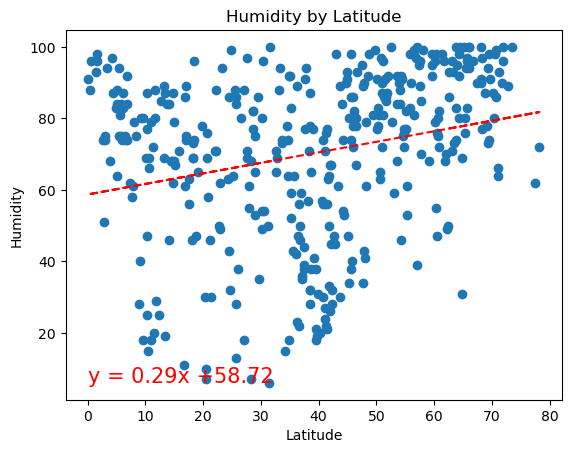

(None, None)

In [94]:
# Northern Hemisphere
regressionplot(northern_hemi_df["Latitude"],northern_hemi_df["Humidity"] )

The r-value is: 0.16162815899620528


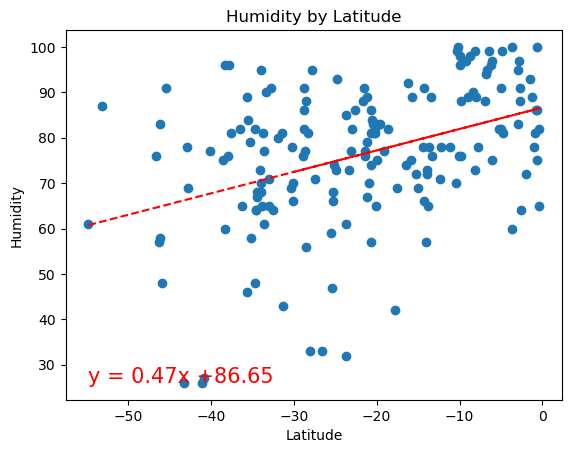

(None, None)

In [95]:
# Southern Hemisphere
regressionplot(southern_hemi_df["Latitude"],southern_hemi_df["Humidity"] )

**Discussion about the linear relationship:** Neither hemisphere has any significant relationship between Latitude and Humidity. This means it is very unlikely that latitude is a factor in a city's level of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.047246547563473754


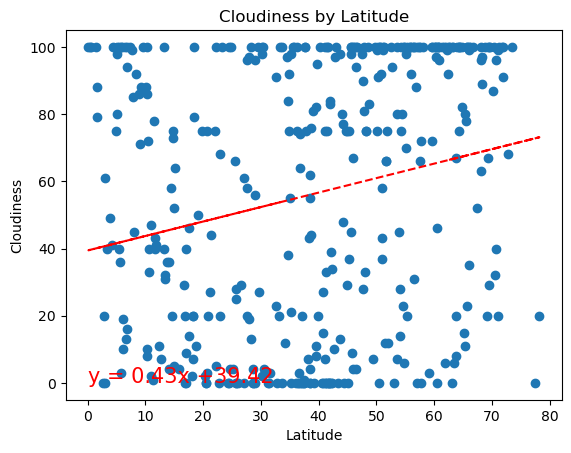

(None, None)

In [96]:
# Northern Hemisphere
regressionplot(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness"] )

The r-value is: 0.06069474586290279


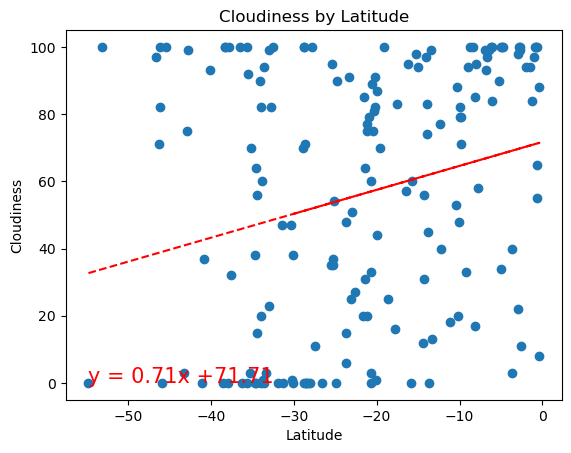

(None, None)

In [97]:
# Southern Hemisphere
regressionplot(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness"] )

**Discussion about the linear relationship:** Neither hemisphere has any significant relationship between Latitude and Cloudiness. This means it is very unlikely that latitude is a factor in a city's amount of clouds on a given day. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007119928447248854


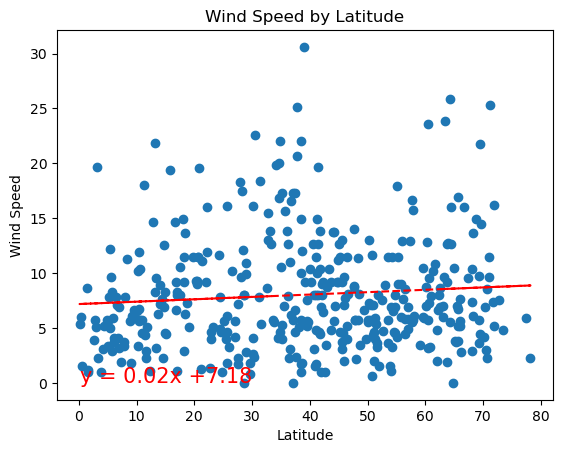

(None, None)

In [98]:
# Northern Hemisphere
regressionplot(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"] )

The r-value is: 0.07934306837949338


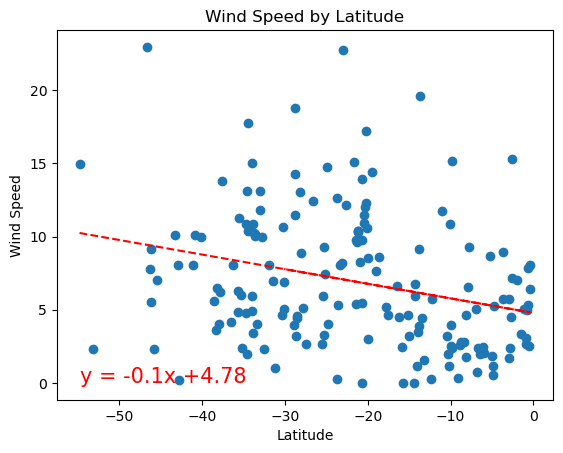

(None, None)

In [99]:
# Southern Hemisphere
regressionplot(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"] )

**Discussion about the linear relationship:** Neither hemisphere has any significant relationship between Latitude and Wind Speed. This means it is very unlikely that latitude is a factor in a city's wind speed experienced for that day. 